# Data Wrangling

* Repositories and users which were created from 2015-01-01 to 2015-12-31 in Github.  
* Data preparing for visualizations and stats of GitHub's newest, most popular repos.

### Merge and tidy repos.csv and users.csv tables to prepare for visualization

In [1]:
import pandas as pd

## Prepare Repo Data

### Load repos data and drop duplicates

In [2]:
repos = pd.read_csv("repos-dump.csv", quotechar = '"', skipinitialspace = True, error_bad_lines = False)
print('Shape before dropping duplicates', repos.shape)

('Shape before dropping duplicates', (7057, 28))


Skipping line 1017: expected 28 fields, saw 31
Skipping line 2773: expected 28 fields, saw 30
Skipping line 5735: expected 28 fields, saw 31



* The quotechar is used to denote the start and end of a quoted item;  
* The skipinitialspace is used to skip spaces after delimiter.

In [3]:
repos = repos.drop_duplicates(subset = 'full_name', keep = 'last')
print('Shape after  dropping duplicates', repos.shape)

('Shape after  dropping duplicates', (7056, 28))


In [8]:
# Drop the columns: 5th to 27th
repos.drop(repos.columns[range(5,28)], axis = 1, inplace = True) 
repos.head()

,full_name,stars,forks,description,language
0,facebook/react-native,24783,4198,A framework for building native apps with React.,JavaScript
1,NARKOZ/hacker-scripts,19836,3553,Based on a true story,JavaScript
2,rackt/redux,11612,1180,Predictable state container for JavaScript apps,JavaScript
3,bevacqua/dragula,10737,593,:ok_hand: Drag and drop so simple it hurts,JavaScript
4,zenorocha/clipboard.js,10268,438,:scissors: Modern copy to clipboard. No Flash....,JavaScript


#### Separate out the user and repo from full_name into new columns:

In [13]:
def extract_user(line):
    return line.split('/')[0]
                      
def extract_repo(line):
    return line.split('/')[1]

repos['user'] = repos['full_name'].apply(extract_user)
repos['repo'] = repos['full_name'].apply(extract_repo)

repos.head()

,full_name,stars,forks,description,language,user,repo
0,facebook/react-native,24783,4198,A framework for building native apps with React.,JavaScript,facebook,react-native
1,NARKOZ/hacker-scripts,19836,3553,Based on a true story,JavaScript,NARKOZ,hacker-scripts
2,rackt/redux,11612,1180,Predictable state container for JavaScript apps,JavaScript,rackt,redux
3,bevacqua/dragula,10737,593,:ok_hand: Drag and drop so simple it hurts,JavaScript,bevacqua,dragula
4,zenorocha/clipboard.js,10268,438,:scissors: Modern copy to clipboard. No Flash....,JavaScript,zenorocha,clipboard.js


## Prepare User Data

### Load user data and drop duplicates

In [14]:
users = pd.read_csv("user-geocodes-dump.csv", quotechar='"', skipinitialspace=True)
print('Shape before dropping duplicates', users.shape)

('Shape before dropping duplicates', (5103, 8))


In [15]:
users = users.drop_duplicates(subset = 'id', keep = 'last')
print('Shape after  dropping duplicates', users.shape)

('Shape after  dropping duplicates', (5103, 8))


In [16]:
users.head()

,id,name,type,location,lat,long,city,country
0,KOWLOR,Malik Dellidj,User,"Lille, France",50.629250,3.057256,Lille,France
1,souporserious,Travis Arnold,User,"San Marcos, CA",33.143372,-117.166145,San Marcos,United States
2,pcqpcq,Joker,User,"Fuzhou, China",26.074508,119.296494,Fuzhou,China
3,ant4g0nist,Chaithu,User,NaN,NaN,NaN,NaN,NaN
4,cs231n,NaN,User,NaN,NaN,NaN,NaN,NaN


#### rename column id to user

In [17]:
users.rename(columns = {'id': 'user'}, inplace = True)
users.head()

,user,name,type,location,lat,long,city,country
0,KOWLOR,Malik Dellidj,User,"Lille, France",50.629250,3.057256,Lille,France
1,souporserious,Travis Arnold,User,"San Marcos, CA",33.143372,-117.166145,San Marcos,United States
2,pcqpcq,Joker,User,"Fuzhou, China",26.074508,119.296494,Fuzhou,China
3,ant4g0nist,Chaithu,User,NaN,NaN,NaN,NaN,NaN
4,cs231n,NaN,User,NaN,NaN,NaN,NaN,NaN


## Merge Repo and User Data

In [19]:
repos_users = pd.merge(repos, users, on = 'user', how = 'left')

repos_users.head()

,full_name,stars,forks,description,language,user,repo,name,type,location,lat,long,city,country
0,facebook/react-native,24783,4198,A framework for building native apps with React.,JavaScript,facebook,react-native,Facebook,User,"Menlo Park, California",37.452960,-122.181725,Menlo Park,United States
1,NARKOZ/hacker-scripts,19836,3553,Based on a true story,JavaScript,NARKOZ,hacker-scripts,Nihad Abbasov,User,"Katowice, Poland",50.264892,19.023782,Katowice,Poland
2,rackt/redux,11612,1180,Predictable state container for JavaScript apps,JavaScript,rackt,redux,NaN,User,NaN,NaN,NaN,NaN,NaN
3,bevacqua/dragula,10737,593,:ok_hand: Drag and drop so simple it hurts,JavaScript,bevacqua,dragula,Nicolás Bevacqua,User,https://twitter.com/nzgb,NaN,NaN,NaN,NaN
4,zenorocha/clipboard.js,10268,438,:scissors: Modern copy to clipboard. No Flash....,JavaScript,zenorocha,clipboard.js,Zeno Rocha,User,"Los Angeles, CA",34.052234,-118.243685,Los Angeles,United States


In [20]:
repos_users.shape

(7056, 14)

## Tidy up repo and user data

#### Re-order the columns:

In [21]:
repos_users = repos_users.reindex_axis(['full_name',
                                        'repo',
                                        'description',
                                        'stars',
                                        'forks',
                                        'language',
                                        'user',
                                        'name',
                                        'type',
                                        'location',
                                        'lat',
                                        'long',
                                        'city',
                                        'country'], axis=1)
repos_users.head()

,full_name,repo,description,stars,forks,language,user,name,type,location,lat,long,city,country
0,facebook/react-native,react-native,A framework for building native apps with React.,24783,4198,JavaScript,facebook,Facebook,User,"Menlo Park, California",37.452960,-122.181725,Menlo Park,United States
1,NARKOZ/hacker-scripts,hacker-scripts,Based on a true story,19836,3553,JavaScript,NARKOZ,Nihad Abbasov,User,"Katowice, Poland",50.264892,19.023782,Katowice,Poland
2,rackt/redux,redux,Predictable state container for JavaScript apps,11612,1180,JavaScript,rackt,NaN,User,NaN,NaN,NaN,NaN,NaN
3,bevacqua/dragula,dragula,:ok_hand: Drag and drop so simple it hurts,10737,593,JavaScript,bevacqua,Nicolás Bevacqua,User,https://twitter.com/nzgb,NaN,NaN,NaN,NaN
4,zenorocha/clipboard.js,clipboard.js,:scissors: Modern copy to clipboard. No Flash....,10268,438,JavaScript,zenorocha,Zeno Rocha,User,"Los Angeles, CA",34.052234,-118.243685,Los Angeles,United States


## Add Overall Ranks

#### Rank each element based on number of stars:

In [22]:
repos_users['rank'] = repos_users['stars'].rank(ascending = False)
repos_users.head()

,full_name,repo,description,stars,forks,language,user,name,type,location,lat,long,city,country,rank
0,facebook/react-native,react-native,A framework for building native apps with React.,24783,4198,JavaScript,facebook,Facebook,User,"Menlo Park, California",37.452960,-122.181725,Menlo Park,United States,2.0
1,NARKOZ/hacker-scripts,hacker-scripts,Based on a true story,19836,3553,JavaScript,NARKOZ,Nihad Abbasov,User,"Katowice, Poland",50.264892,19.023782,Katowice,Poland,4.0
2,rackt/redux,redux,Predictable state container for JavaScript apps,11612,1180,JavaScript,rackt,NaN,User,NaN,NaN,NaN,NaN,NaN,9.0
3,bevacqua/dragula,dragula,:ok_hand: Drag and drop so simple it hurts,10737,593,JavaScript,bevacqua,Nicolás Bevacqua,User,https://twitter.com/nzgb,NaN,NaN,NaN,NaN,10.0
4,zenorocha/clipboard.js,clipboard.js,:scissors: Modern copy to clipboard. No Flash....,10268,438,JavaScript,zenorocha,Zeno Rocha,User,"Los Angeles, CA",34.052234,-118.243685,Los Angeles,United States,11.0


The [pandas.DataFrame.rank](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rank.html) detail.

#### How did the user(donnemartin) perform in the github (2015-01-01..2015-12-31)?

In [23]:
repos_users[repos_users['user'] == 'donnemartin']

,full_name,repo,description,stars,forks,language,user,name,type,location,lat,long,city,country,rank
2760,donnemartin/data-science-ipython-notebooks,data-science-ipython-notebooks,Continually updated data science Python notebo...,3945,623,Python,donnemartin,Donne Martin,User,"Washington, D.C.",38.907192,-77.036871,Washington,United States,80.0
2771,donnemartin/saws,saws,A supercharged AWS command line interface (CLI...,2591,88,Python,donnemartin,Donne Martin,User,"Washington, D.C.",38.907192,-77.036871,Washington,United States,175.0
2775,donnemartin/interactive-coding-challenges,interactive-coding-challenges,"Continually updated interactive, test-driven P...",2121,256,Python,donnemartin,Donne Martin,User,"Washington, D.C.",38.907192,-77.036871,Washington,United States,244.0
2782,donnemartin/awesome-aws,awesome-aws,A curated list of awesome Amazon Web Services ...,1631,96,Python,donnemartin,Donne Martin,User,"Washington, D.C.",38.907192,-77.036871,Washington,United States,352.0
2783,donnemartin/dev-setup,dev-setup,Mac OS X development environment setup: Easy-...,1581,197,Python,donnemartin,Donne Martin,User,"Washington, D.C.",38.907192,-77.036871,Washington,United States,363.5


#### How about Python?

In [24]:
repos_users[repos_users['language'] == 'Python'].shape

(552, 15)

#### How about other languages?

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

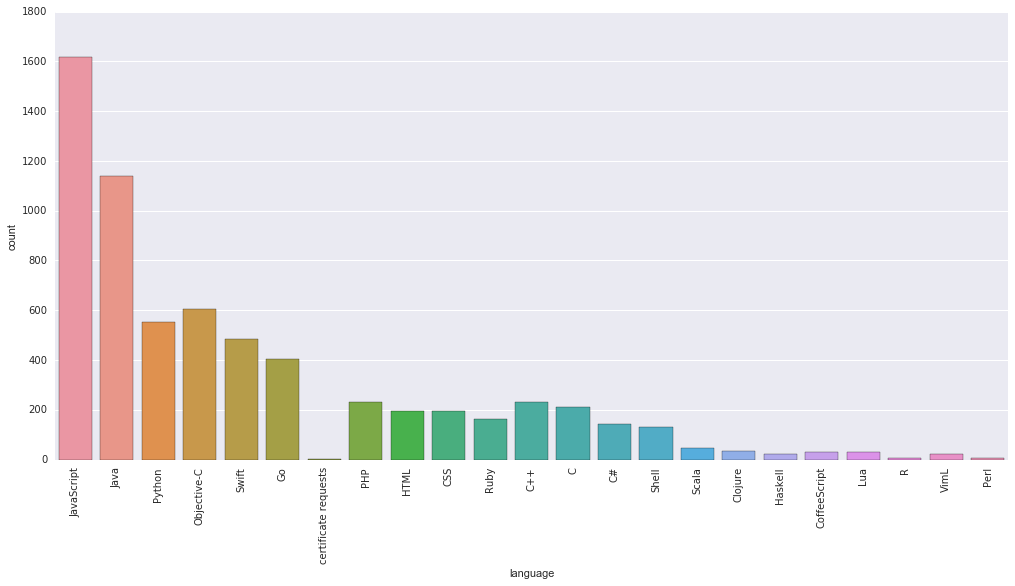

In [39]:
g = sns.factorplot('language', kind = 'count', data = repos_users, size = 7, aspect = 2)
g.set_xticklabels(rotation = 90)

## Output Results

#### Write out the results to csv to visualize in Tableau:

In [40]:
repos_users.to_csv('new_repos-users-geocodes.csv', index = False)
users.to_csv('new_users.csv', index  = False)